In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=abdc093d9046591942300b0d3d228a542ec0c2717c4ca11caed907ca136d192a
  Stored in directory: c:\users\isgoel\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Import the basic packages
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('news.csv')

In [6]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
data.shape

(6335, 4)

In [31]:
#Check for any null values in the dataset
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [17]:
target = data.label

In [18]:
target

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [19]:
#Look at the news distribution 
import matplotlib.pyplot as plt
import seaborn as sns

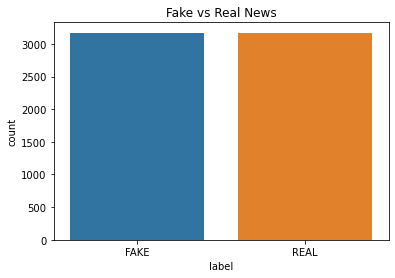

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [27]:
#Look at distribution counts 

sns.countplot(x=target,data=data)

plt.title('Fake vs Real News')
plt.show()

target.value_counts()

In [71]:
#split data into train test 

x_train, x_test, y_train, y_test = train_test_split(data['text'],target,test_size=0.25,random_state=1234)

In [72]:
x_train.shape

(4751,)

In [73]:
y_train.shape

(4751,)

In [74]:
x_test.shape


(1584,)

In [75]:
y_test.shape

(1584,)

In [76]:
#Remove stop words 
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(stop_words='english', max_df=0.7)

In [77]:
#Transform the training set 
tf_train = tf_idf.fit_transform(x_train)


In [78]:
#Transform the test set 
tf_test = tf_idf.transform(x_test)


In [79]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [80]:
pc=PassiveAggressiveClassifier(max_iter=50)
pc.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [81]:
#Predict on test data, and check accuracy 
y_pred = pc.predict(tf_test)
y_pred

array(['REAL', 'REAL', 'REAL', ..., 'FAKE', 'REAL', 'FAKE'], dtype='<U4')

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [83]:
accuracy = accuracy_score(y_pred,y_test)
print ('The accuracy score of the model is ')

In [84]:
accuracy

0.9324494949494949

In [86]:
print (f'Accuracy Score is: {round(accuracy*100,2)} %')

Accuracy Score is: 93.24 %


In [87]:
# Confusion Matrix of the 

cm = confusion_matrix(y_pred,y_test)

In [88]:
print(cm)

[[749  56]
 [ 51 728]]
